In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report

In [3]:
# reading dataset
df = pd.read_csv("diabetes.csv")
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
149,2,90,70,17,0,27.3,0.085,22,0
414,0,138,60,35,167,34.6,0.534,21,1
452,0,91,68,32,210,39.9,0.381,25,0
81,2,74,0,0,0,0.0,0.102,22,0
666,4,145,82,18,0,32.5,0.235,70,1


In [ ]:
##EDA and Data Preprocessing

In [4]:
# find the shape of datset
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# getting statical information about our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# checking dublicate rows in dataset
df.duplicated().sum()

0

In [9]:
# getting numerical and categorical features form our dataset
numerical_features = [feature for feature in df.columns if df[feature].dtypes not in ['O', 'o', 'object']]
categorical_fatures = [feature for feature in df.columns if df[feature].dtypes in ['O', 'o', 'object']]

In [10]:
numerical_features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [11]:
categorical_fatures

[]

In [12]:
# First of all analysing target feature i.e Outcome
# find the unique values count in our target feature
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

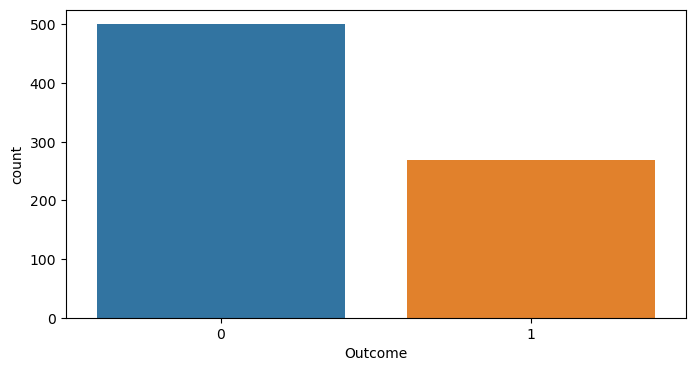

In [13]:
# plot a counter plot to better understand our target feature
plt.figure(figsize=(8,4))
sns.countplot(x = 'Outcome',data = df)
plt.show()

C:\Users\sahoo\anaconda3\envs\iimenv1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


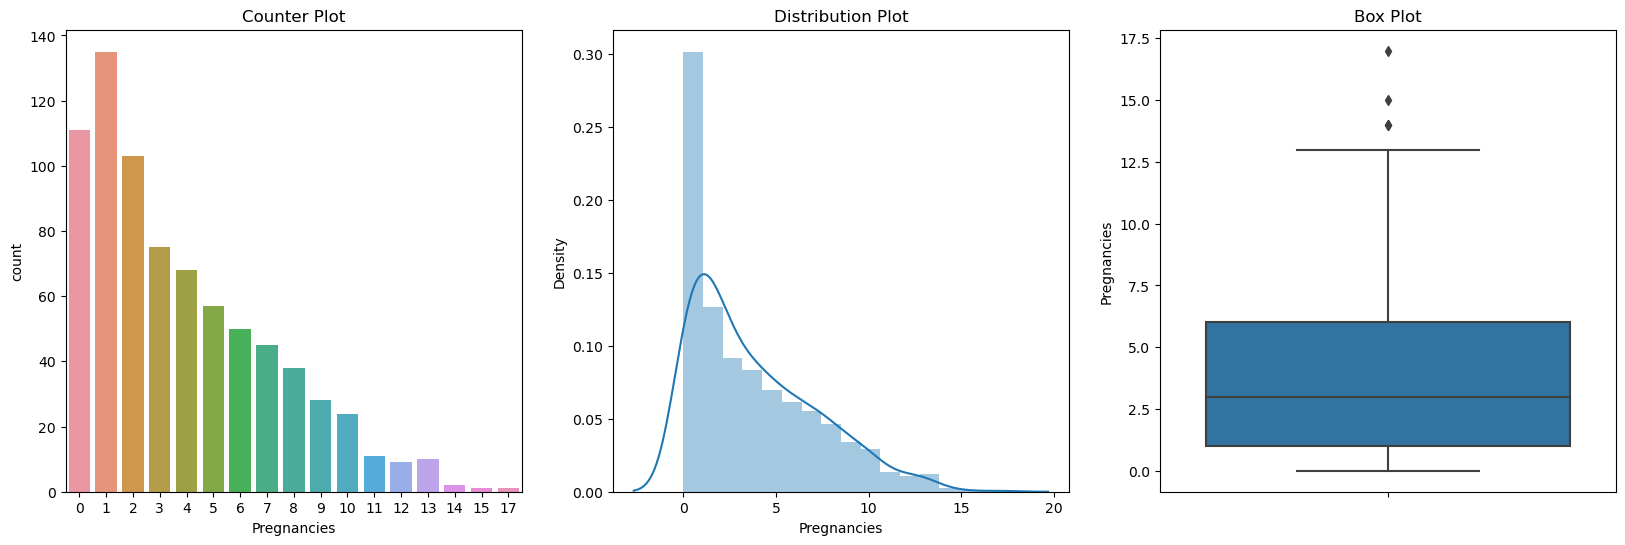

In [14]:
# Pregnancies
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=df["Pregnancies"])

plt.show()

C:\Users\sahoo\anaconda3\envs\iimenv1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


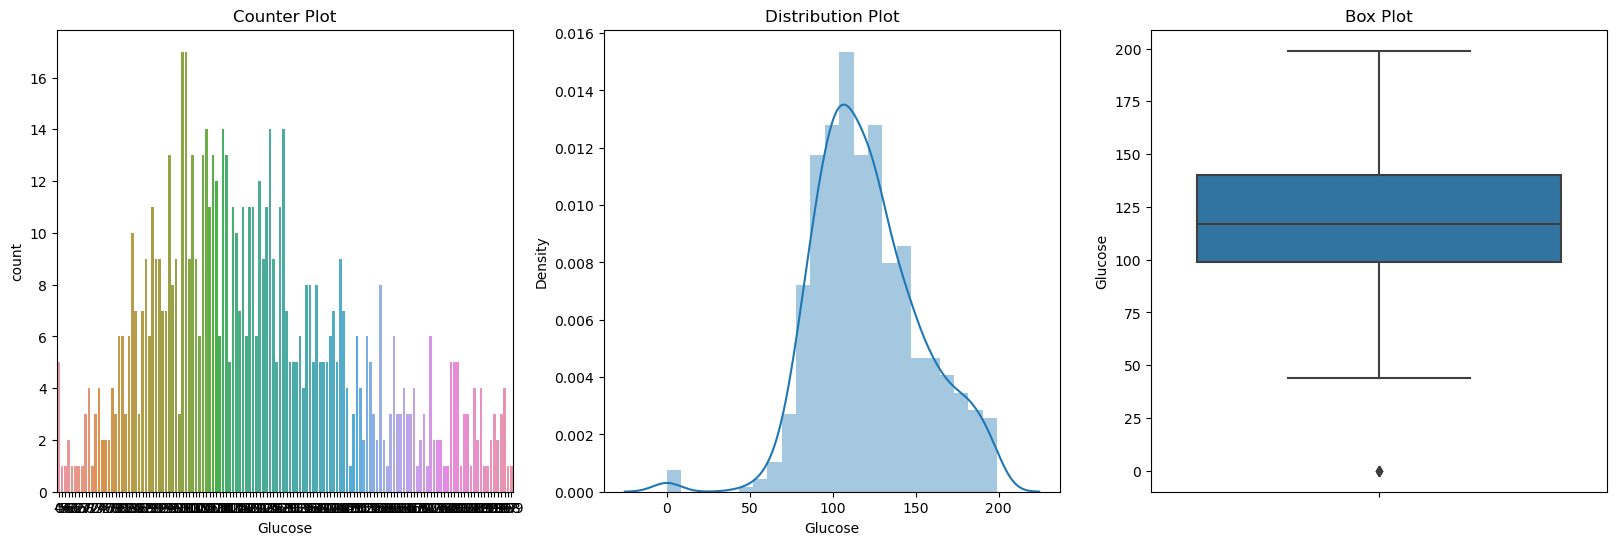

In [15]:
# Glucose
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Glucose',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["Glucose"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=df["Glucose"])

plt.show()

C:\Users\sahoo\anaconda3\envs\iimenv1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


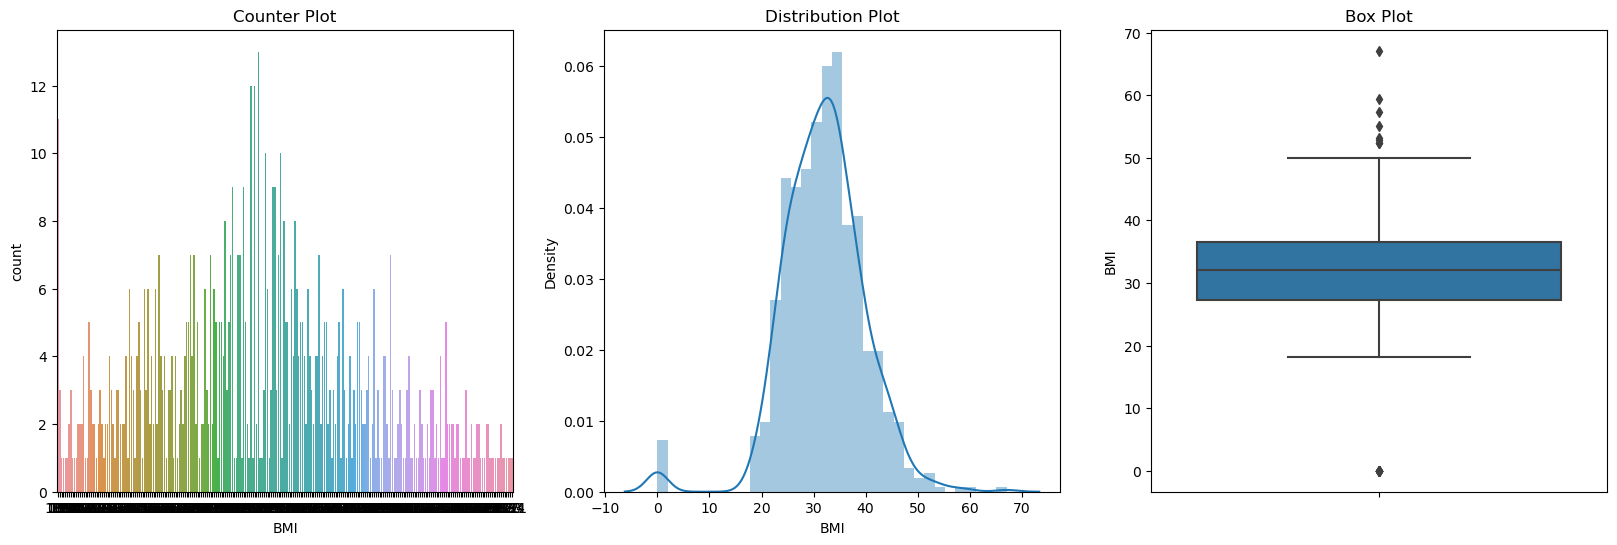

In [16]:
# BMI
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'BMI',data = df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df["BMI"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=df["BMI"])

plt.show()

In [17]:
# Findin the correlation between each features
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


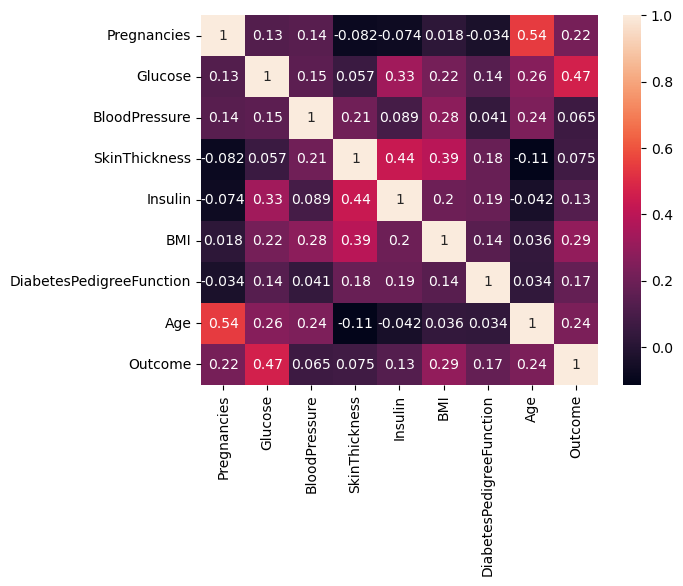

In [18]:
# Headmap
sns.heatmap(corr, annot = True)
plt.show()

In [19]:
# Feature engineering

In [20]:
# Replacing zero values with NaN
dataset = df
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [21]:
# Count of NaN
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [22]:
# Replacing NaN with mean values
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [23]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [24]:
# divide dataset into target and features varaibles
y = dataset['Outcome']
X = dataset.drop('Outcome', axis=1)

In [25]:
# Spliting data into train and test set and also kept target data ration same
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )
print("Shape of Training dataset: ", X_train.shape)
print("ShaXpe of Testing dataset: ", X_test.shape)

Shape of Training dataset:  (614, 8)
ShaXpe of Testing dataset:  (154, 8)


In [26]:
# Scaling our dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 1. Logistic Regression

In [28]:
# Building Model For Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [29]:
# Traning Logistic Regression Model
# Logistic regression works well on scalled 
lr_model.fit(X_train_scaled, y_train)
y_predict = lr_model.predict(X_test_scaled)

In [30]:
# Getting all accuracy socres for Logistic Regression
accuracy = accuracy_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("F1: ", f1)

Accuracy:  0.6948051948051948
Recall:  0.48148148148148145
F1:  0.5252525252525252


In [31]:
# Prinint overall classification report for Logistic Regression
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.81      0.78       100
           1       0.58      0.48      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



In [32]:
# 2. Decision Tree

In [33]:
# Building Model For Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
# scalling doest affect decision tree
dt_model.fit(X_test, y_test)
y_pred = dt_model.predict(X_test)

In [34]:
# getting all types of accuracy for decision tree
dt_accuracy = accuracy_score(y_test,y_pred)
dt_recall = recall_score(y_test,y_pred)
dt_f1 = f1_score(y_test,y_pred)

print("Accuracy: ", dt_accuracy)
print("Recall: ", dt_recall)
print("F1: ", dt_f1)

Accuracy:  0.9285714285714286
Recall:  0.9074074074074074
F1:  0.8990825688073394


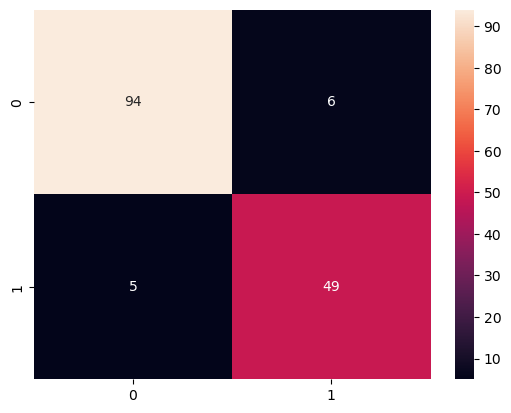

In [35]:
# plotting counfusion metric for decision tree
dt_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(dt_cm, annot=True)
plt.show()

In [37]:
# printing overall report for decision tree
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       100
           1       0.89      0.91      0.90        54

    accuracy                           0.93       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



In [38]:
# 3. Random Forest

In [39]:
# Building model for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [40]:
# getting all types of evaulation scores
rf_accuracy = accuracy_score(y_test,y_pred)
rf_recall = recall_score(y_test,y_pred)
rf_f1 = f1_score(y_test,y_pred)

print("Accuracy: ", rf_accuracy)
print("Recall: ", rf_recall)
print("F1: ", rf_f1)

Accuracy:  0.7857142857142857
Recall:  0.6296296296296297
F1:  0.6732673267326733


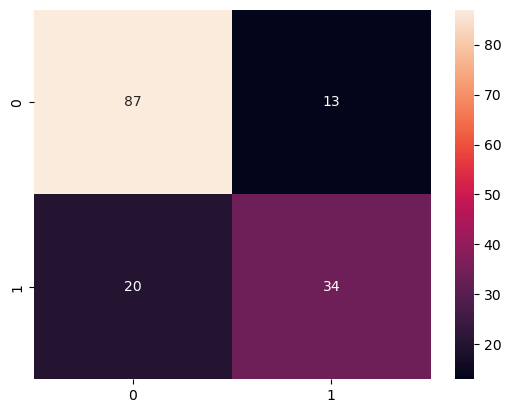

In [41]:
# plotting confusion metrix for random forest
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot=True)
plt.show()

In [42]:
# Printing overall report for random forest
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [44]:
# Conclusion

In [45]:
y_predict = dt_model.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


C:\Users\sahoo\anaconda3\envs\iimenv1\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
